In [219]:
import matplotlib.pyplot as plt
import numpy as np

In [502]:
class particle:
    def __init__(self, x, y, q, xind, yind):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.mass = 1.0
        self.q = q
        self.xind = xind
        self.yind = yind
def createParticleArray(Nparticles, dx, dy, Nx, Ny, q):
    particles = []
    H = dx*dy
    xMax = Nx*dx - dx
    yMax = Ny*dy - dy
    density = np.zeros((Nx, Ny))
    for i in range(Nparticles):
        mean = (xMax/2, yMax/2)

        cov = [[.1, 0], [0, .1]]
        xrand, yrand = np.random.multivariate_normal(mean, cov)
        #xrand = np.random.uniform(high=xMax)
        #yrand = np.random.uniform(high=yMax)
        xind = int(np.floor(Nx/xMax * xrand))
        yind = int(np.floor(Ny/yMax * yrand))
        
        p = particle(xrand, yrand, q, xind, yind)
        particles.append(p)
        w = q/H * 1-np.linalg.norm([xrand-xind*dx,yrand - yind*dy])/H
        #print(w)
        density[xind,yind] += w
        
    return np.array(particles), np.array(density)

In [503]:
def solvePoisson(density, Nx, Ny, dx, dy):
    F = np.fft.fft2(density) #This computes capital f
 
    kx = np.fft.fftfreq(Nx)/dx #Getting kx
    ky = np.fft.fftfreq(Ny)/dy #Getting ky

    kx2d = np.repeat(kx, Ny) #2d
    kx2d.shape = (Nx, Ny) #2d

    ky2d = np.repeat(ky, Nx) #y2d
    ky2d.shape = (Ny, Nx) #y2d
    ky2d = np.transpose(ky2d)
    oldDC = F[0,0] #oldDC
    F = 0.5*F/( (np.cos(2.0*np.pi*kx2d/Nx) - 1.0)/dx**2 +
                (np.cos(2.0*np.pi*ky2d/Ny) - 1.0)/dy**2) #Norming F

    F[0,0] = oldDC #Setting oldDC

    # transform back to real space
    fsolution = np.real(np.fft.ifft2(F)) #ifft2 of captial f
    return fsolution #return the solution

In [504]:
def getForces(potential, Nx, Ny, dx, dy):

    forces = -1 * np.array(np.gradient(potential))
    forcex = forces[0,:,:]
    forcey = forces[1,:,:]
    
    return forces, forcex, forcey

In [505]:
def updateParticles(particles, forcesx, forcesy, Nx, Ny, dx, dy, dt):
    mass = 1.0
    for particle in particles:
        particle.vx += forcesx[particle.xind, particle.yind]*dt/(2.0*mass)
        particle.vy += forcesy[particle.xind, particle.yind]*dt/(2.0*mass)
        particle.x += particle.vx * dt
        particle.y += particle.vy * dt
        particle.vx += forcesx[particle.xind, particle.yind]*dt/(2.0*mass)
        particle.vy += forcesy[particle.xind, particle.yind]*dt/(2.0*mass)
        xmax = Nx * dx - dx
        ymax = Ny * dy - dy
        particle.xind = int(np.floor(Nx/xmax * particle.x))
        particle.yind = int(np.floor(Ny/ymax * particle.y))
        
        if particle.xind < 0:
            particle.x += Nx*dx
            particle.xind = particle.xind + Nx
        elif particle.xind >= Nx:
            particle.x -= Nx*dx
            particle.xind = particle.xind - Nx
        if particle.yind < 0:
            particle.y += Ny*dy
            particle.yind += Ny
        elif particle.yind >= Ny:
            particle.y -= Ny*dy
            particle.yind = particle.yind - Ny
        
    return particles
def updateDensity(particles, Nx, Ny, dx, dy, q):
    H = dx * dy
    density = np.zeros((Nx,Ny))
    for particle in particles:
        density[particle.xind, particle.yind] += q/H * (1.0 - np.sqrt((particle.x - dx*particle.xind)**2 + (particle.y - dy*particle.yind)**2)/H)
    return density

Entering 0  time step


C:\Users\mjcuf\Miniconda3\envs\lotus\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mjcuf\Miniconda3\envs\lotus\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


Entering 1  time step
Entering 2  time step
Entering 3  time step
Entering 4  time step
Entering 5  time step
Entering 6  time step
Entering 7  time step
Entering 8  time step
Entering 9  time step
Entering 10  time step
Entering 11  time step
Entering 12  time step
Entering 13  time step
Entering 14  time step
Entering 15  time step
Entering 16  time step
Entering 17  time step
Entering 18  time step
Entering 19  time step
Entering 20  time step
Entering 21  time step
Entering 22  time step
Entering 23  time step
Entering 24  time step
Entering 25  time step
Entering 26  time step
Entering 27  time step
Entering 28  time step
Entering 29  time step
Entering 30  time step
Entering 31  time step
Entering 32  time step
Entering 33  time step
Entering 34  time step
Entering 35  time step
Entering 36  time step
Entering 37  time step
Entering 38  time step
Entering 39  time step
Entering 40  time step
Entering 41  time step
Entering 42  time step
Entering 43  time step
Entering 44  time st

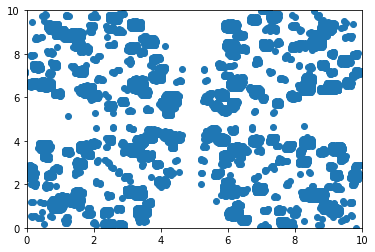

In [509]:
#Constants
Nparticles = 10000
dx = 0.1
dy = 0.1
Nx = 100
Ny = 100
q = 0.0001
particleArray, density = createParticleArray(Nparticles, dx, dy, Nx, Ny, q)
for i in range(100):
    print("Entering", i, " time step")
    potential=solvePoisson(density, Nx, Ny, dx, dy)
    forces, forcesx, forcesy = getForces(np.real(potential), Nx, Ny, dx, dy)
    forces = np.sqrt(forcesx**2 + forcesy**2)
    particleArray = updateParticles(particleArray, forcesx, forcesy, Nx, Ny, dx, dy, dt=0.01)
    particlex = np.array([particle.x for particle in particleArray])
    particley = np.array([particle.y for particle in particleArray])
    plt.clf()
    plt.scatter(particlex, particley)
    plt.xlim(0, Nx*dx)
    plt.ylim(0, Ny*dy)
    density = updateDensity(particleArray, Nx, Ny, dx, dy ,q)
    #plt.imshow(density)
    plt.savefig("PMSolver/run1/particles_" + str(i) + ".png")

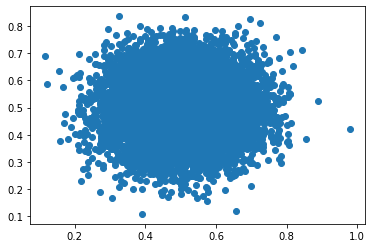

In [486]:
plt.scatter(particlex, particley)

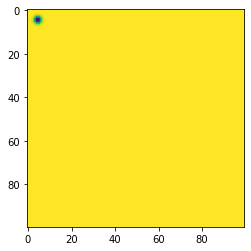

In [487]:
plt.imshow(density)

In [488]:
potential = solvePoisson(density, Nx, Ny, dx, dy)

C:\Users\mjcuf\Miniconda3\envs\lotus\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\mjcuf\Miniconda3\envs\lotus\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


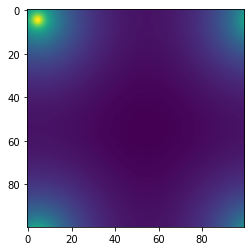

In [489]:
plt.imshow(np.real(potential))

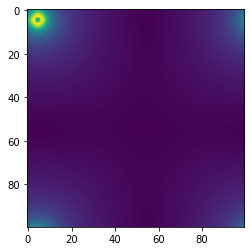

In [490]:
forces, forcesx, forcesy = getForces(np.real(potential), Nx, Ny, dx, dy)
forces = np.sqrt(forcesx**2 + forcesy**2)
plt.imshow(forces)

In [494]:
particleArray = updateParticles(particleArray, forcesx, forcesy, Nx, Ny, dx, dy, dt=0.01)

In [495]:
density = updateDensity(particleArray, Nx, Ny, dx, dy ,q)

IndexError: index 118 is out of bounds for axis 0 with size 100

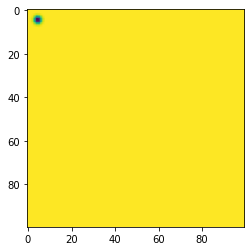

In [493]:
plt.imshow(density)

array([0.61791725, 0.61888491])